In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import data

In [217]:
import os
os.chdir("G:\ANACONDA\data")
df=pd.read_excel("games_indie.xlsx")

In [218]:
print(df.head())

   Unnamed: 0          Title         Release Date                   Team  \
0           1          Hades  2019-12-10 00:00:00   ['Supergiant Games']   
1           3      Undertale  2015-09-15 00:00:00     ['tobyfox', '8-4']   
2           4  Hollow Knight  2017-02-24 00:00:00        ['Team Cherry']   
3           6          Omori  2020-12-25 00:00:00  ['OMOCAT', 'PLAYISM']   
4           8       Among Us  2018-06-15 00:00:00         ['InnerSloth']   

   Rating Times Listed Number of Reviews  \
0     4.3         2.9K              2.9K   
1     4.2         3.5K              3.5K   
2     4.4           3K                3K   
3     4.2         1.6K              1.6K   
4     3.0          867               867   

                                              Genres  \
0           ['Adventure', 'Brawler', 'Indie', 'RPG']   
1  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
2                 ['Adventure', 'Indie', 'Platform']   
3  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...  

In [219]:
df = df.iloc[:,1:]

pre-process and cleaning

In [221]:
#convert k_string to value
def convert_k(val):
        if isinstance(val,str):
            val = val.strip()
            if val.endswith("K"):
                try:
                    return int(float(val[:-1])*1000)
                except ValueError:
                    return None
            else:
                try:
                    return int(val)
                except ValueError:
                    return None
        return val

cols_to_convert = ["Times Listed","Number of Reviews","Plays","Playing","Backlogs","Wishlist"]

for col in cols_to_convert:
    if col in df.columns:
        df[col]=df[col].apply(convert_k)

print(df[cols_to_convert].head(10))
df = df.dropna(subset=cols_to_convert)

   Times Listed  Number of Reviews  Plays  Playing  Backlogs  Wishlist
0          2900               2900  21000     3200      6300      3600
1          3500               3500  28000      679      4900      1800
2          3000               3000  21000     2400      8300      2300
3          1600               1600   7200     1100      4500      3800
4           867                867  25000      470       776       126
5          1500               1500   7700      801      2500      3400
6          2800               2800  20000     1200      5900      2000
7          1100               1100   6000     1200      5000      2700
8          1900               1900  18000     1200      4500      2600
9           820                820   2200      419      1900      2200


In [222]:
df['Release Date'] = pd.to_datetime(df["Release Date"], errors="coerce")

In [223]:
df.to_csv("games_cleaned.csv", index=False)

In [224]:
df1=pd.read_csv("games_cleaned.csv")
print(df1.head())

           Title Release Date                   Team  Rating  Times Listed  \
0          Hades   2019-12-10   ['Supergiant Games']     4.3          2900   
1      Undertale   2015-09-15     ['tobyfox', '8-4']     4.2          3500   
2  Hollow Knight   2017-02-24        ['Team Cherry']     4.4          3000   
3          Omori   2020-12-25  ['OMOCAT', 'PLAYISM']     4.2          1600   
4       Among Us   2018-06-15         ['InnerSloth']     3.0           867   

   Number of Reviews                                             Genres  \
0               2900           ['Adventure', 'Brawler', 'Indie', 'RPG']   
1               3500  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
2               3000                 ['Adventure', 'Indie', 'Platform']   
3               1600  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                867                              ['Indie', 'Strategy']   

                                             Summary  \
0  A rogue-lite hack and

1. differences in conversion rates across stages

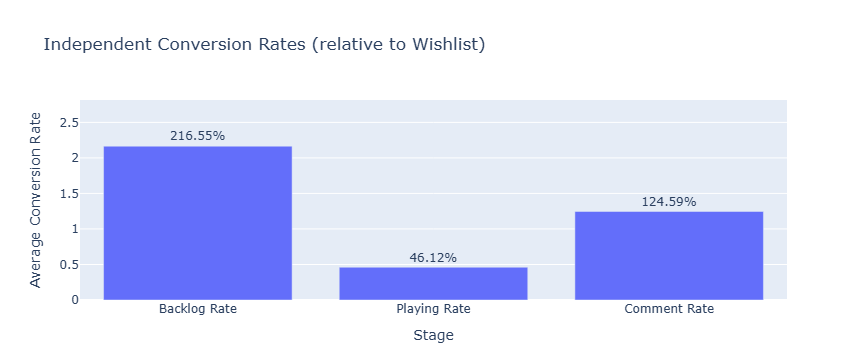

In [226]:
df1['backlog_rate'] = df1['Backlogs'] / df1['Wishlist']
df1['playing_rate'] = df1['Playing'] / df1['Wishlist']
df1['comment_rate'] = df1['Number of Reviews'] / df1['Wishlist']

# remove invalid values
df_filtered = df1[(df1['Wishlist'] > 0) & (df1['backlog_rate'] < 10) & (df1['playing_rate'] < 10)]

avg_rates = {
    'Backlog Rate': df_filtered['backlog_rate'].mean(),
    'Playing Rate': df_filtered['playing_rate'].mean(),
    'Comment Rate': df_filtered['comment_rate'].mean()
}
# plot bar chart
fig_bar = px.bar(
    x=list(avg_rates.keys()), 
    y=list(avg_rates.values()),
    text=[f"{v:.2%}" for v in avg_rates.values()],
    title="Independent Conversion Rates (relative to Wishlist)",
    labels={'x':'Stage', 'y':'Average Conversion Rate'}
)
fig_bar.update_traces(textposition='outside')
fig_bar.update_layout(
    yaxis = dict(range=[0,max(avg_rates.values())*1.3]),
    margin = dict(t=100,b=60)
)
fig_bar.show()

2. differences in conversion rates across genres

In [228]:
df_raw = pd.read_csv("games_cleaned.csv")
print(df_raw['Genres'].head(10).to_list())
#analyse 'Genres'
df_raw['Genres'] = df_raw['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
print(df_raw['Genres'].head())
#explode
df_exploded = df_raw.explode('Genres')
#remove empty lines
df_exploded = df_exploded.dropna(subset=['Genres'])
df_exploded = df_exploded[df_exploded['Genres']!='']
df_exploded = df_exploded[df_exploded['Genres'] != 'Indie']

print(df_exploded[['Title','Genres']].head(10))

["['Adventure', 'Brawler', 'Indie', 'RPG']", "['Adventure', 'Indie', 'RPG', 'Turn Based Strategy']", "['Adventure', 'Indie', 'Platform']", "['Adventure', 'Indie', 'RPG', 'Turn Based Strategy']", "['Indie', 'Strategy']", "['Adventure', 'Indie']", "['Adventure', 'Indie', 'Platform']", "['Adventure', 'Indie', 'RPG']", "['Arcade', 'Indie', 'Platform', 'Shooter']", "['Adventure', 'Indie']"]
0                [Adventure, Brawler, Indie, RPG]
1    [Adventure, Indie, RPG, Turn Based Strategy]
2                    [Adventure, Indie, Platform]
3    [Adventure, Indie, RPG, Turn Based Strategy]
4                               [Indie, Strategy]
Name: Genres, dtype: object
           Title               Genres
0          Hades            Adventure
0          Hades              Brawler
0          Hades                  RPG
1      Undertale            Adventure
1      Undertale                  RPG
1      Undertale  Turn Based Strategy
2  Hollow Knight            Adventure
2  Hollow Knight             

In [229]:
from scipy.stats import f_oneway
df_exploded['comment_conversion_rate'] = df_exploded['Number of Reviews'] / df_exploded['Wishlist']
#remove invalid values
df_exploded = df_exploded[df_exploded['Wishlist'] > 0]
df_exploded = df_exploded[df_exploded['comment_conversion_rate'].between(0, 5)]
#count samples across genres
genre_counts = df_exploded['Genres'].value_counts()
#remove sample counts<5
valid_genres = genre_counts[genre_counts >=5].index
df_filtered = df_exploded[df_exploded['Genres'].isin(valid_genres)]
print("sample size of each genre：")
print(genre_counts.head(10))

sample size of each genre：
Genres
Adventure              200
RPG                     85
Platform                68
Puzzle                  66
Simulator               52
Strategy                46
Arcade                  32
Shooter                 28
Point-and-Click         24
Turn Based Strategy     22
Name: count, dtype: int64


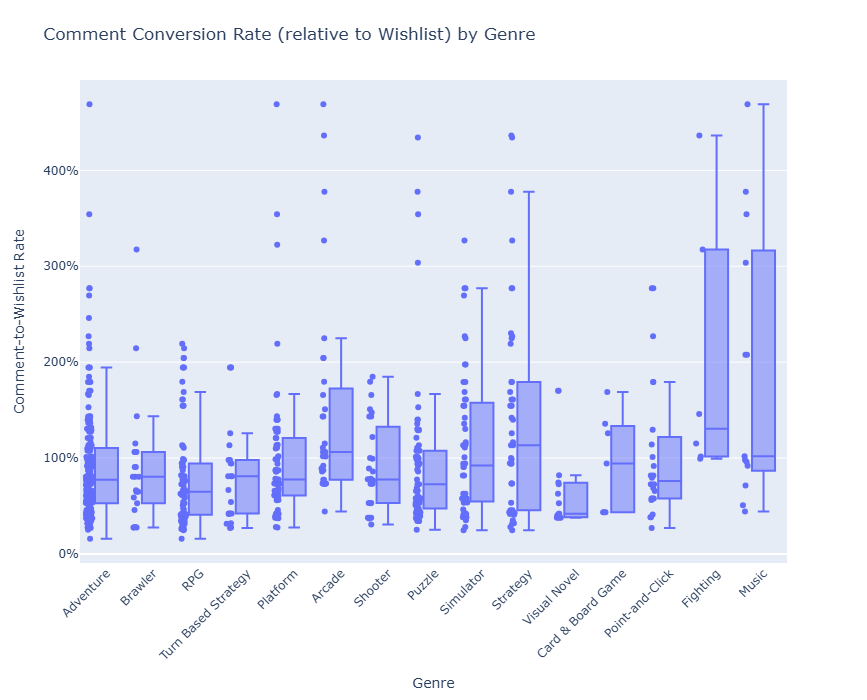

In [230]:
#plot box plot
fig = px.box(
    df_filtered,
    x='Genres',
    y='comment_conversion_rate',
    points='all', 
    title='Comment Conversion Rate (relative to Wishlist) by Genre',
    labels={'comment_conversion_rate': 'Comment-to-Wishlist Rate', 'Genres': 'Genre'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=".0%",
    height=700,
    margin=dict(t=80, b=100)
)
fig.show()

In [231]:
# significance test(ANOVA)
groups = [
    g['comment_conversion_rate'].dropna() 
    for _, g in df_exploded.groupby('Genres') 
    if len(g) >= 5
]

stat, p_value = f_oneway(*groups)
print(f"\n ANOVA test result：F = {stat:.3f}, p = {p_value:.6f}")

if p_value < 0.05:
    print("There is significant differences in commeent conversion rate across genres")
else:
    print("No significant differences detected（p ≥ 0.05）")


 ANOVA test result：F = 5.357, p = 0.000000
There is significant differences in commeent conversion rate across genres


3. convertion rate by genres across time

In [251]:
#extract 'release year'
df_exploded['Release Year'] = pd.to_datetime(df_exploded['Release Date'], errors='coerce').dt.year
df_exploded['Release Year'] = df_exploded['Release Year'].astype('Int64')

#count games by year
year_counts = (
    df_exploded[['Title', 'Release Year']]
    .drop_duplicates(subset='Title')
    ['Release Year']
    .value_counts()
    .sort_index()
)
print("game counts by year:")
print(year_counts)

game counts by year:
Release Year
2001     1
2002     1
2003     1
2004     3
2007     1
2008     3
2009     2
2010     4
2011     2
2012     9
2013     9
2014    12
2015    10
2016    16
2017    15
2018    24
2019    17
2020    14
2021    23
2022    29
2023     2
2024     1
Name: count, dtype: Int64


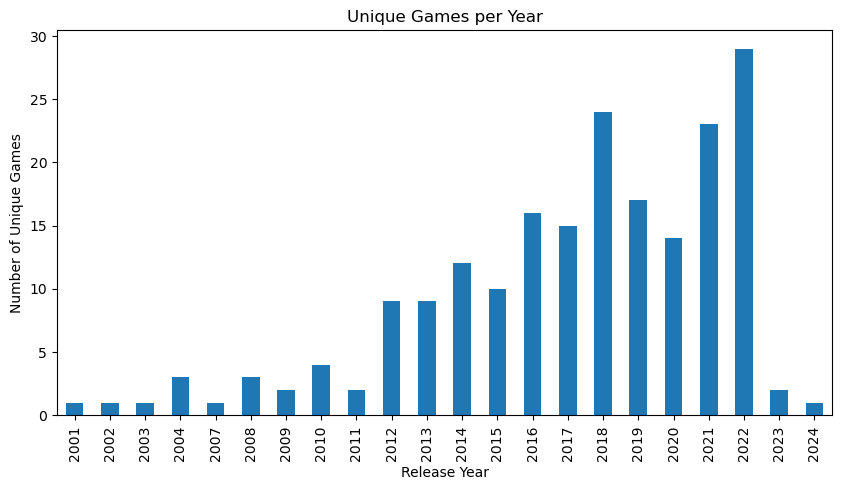

In [253]:
#visualize yearly distribution
plt.figure(figsize=(10,5))
year_counts.plot(kind='bar')
plt.title("Unique Games per Year")
plt.ylabel("Number of Unique Games")
plt.xlabel("Release Year")
plt.show()

In [301]:
#retain years with a sample size>5
valid_years = year_counts[year_counts >= 5].index
df_year_filtered = df_exploded[df_exploded['Release Year'].isin(valid_years)]
print(f"\n retained year: {list(valid_years)}")
print(f"\n retained sample size:{len(df_year_filtered)}")

#filter top 5 genres
top5_genres = df_year_filtered['Genres'].value_counts().nlargest(5).index
df_top5 = df_year_filtered[df_year_filtered['Genres'].isin(top5_genres)]
print(f"\n top 5 genres: {list(top5_genres)}")
print(f"\n filtered sample size:{len(df_top5)}")

#preview
print("\n filtered data preview:")
print(df_top5[['Title','Release Year','Genres']].head(10))


 retained year: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

 retained sample size:629

 top 5 genres: ['Adventure', 'RPG', 'Platform', 'Puzzle', 'Simulator']

 filtered sample size:427

 filtered data preview:
           Title  Release Year     Genres
0          Hades          2019  Adventure
0          Hades          2019        RPG
1      Undertale          2015  Adventure
1      Undertale          2015        RPG
2  Hollow Knight          2017  Adventure
2  Hollow Knight          2017   Platform
3          Omori          2020  Adventure
3          Omori          2020        RPG
5          Stray          2022  Adventure
6        Celeste          2018  Adventure


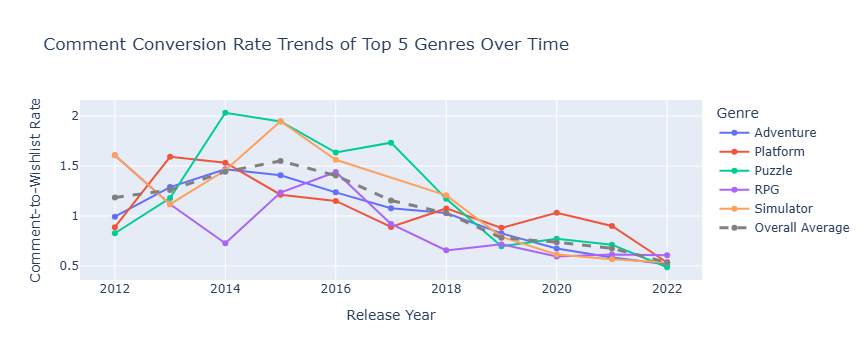

In [329]:
df_summary = (
    df_top5.groupby(['Release Year', 'Genres'])['comment_conversion_rate']
    .mean()
    .reset_index()
)

#smoothing
df_summary['SmoothedRate'] = (
    df_summary.groupby('Genres')['comment_conversion_rate']
    .transform(lambda x: x.rolling(window=2, min_periods=1).mean())
)
#average baseline
df_avg = (
    df_summary.groupby('Release Year')['SmoothedRate']
    .mean()
    .reset_index()
)
df_avg['Genres'] = 'Overall Average'
df_combined = pd.concat([df_summary, df_avg], ignore_index=True)

# plot line chart
fig_top5 = px.line(
    df_combined,
    x='Release Year',
    y='SmoothedRate',
    color='Genres',
    markers=True,
    title='Comment Conversion Rate Trends of Top 5 Genres Over Time',
    labels={'SmoothedRate': 'Average Comment/Wishlist Conversion Rate'}
)
#baseline format
fig_top5.for_each_trace(
    lambda trace: trace.update(
        line=dict(color='gray', width=3, dash='dash'),
        name='Overall Average'
    ) if trace.name == 'Overall Average' else ()
)
fig_top5.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Comment-to-Wishlist Rate',
    legend_title='Genre',
    hovermode='x unified'
)

fig_top5.show()